In [41]:
import csv

RefTraj = []
with open("data/global_plan.csv", 'r') as file:
    csvreader = csv.reader(file)
    header = next(csvreader)
    RefTraj.append(header)
    for row in csvreader:
        RefTraj.append(row)

In [53]:
RefTraj_X = []
RefTraj_Y = []
for i in range(1,len(RefTraj)):
    #print(i)
    RefTraj_X.append(float(RefTraj[i][0]))
    RefTraj_Y.append(float(RefTraj[i][1]))

In [57]:
#print(type(RefTraj_X[1]))
len(RefTraj_X)

203

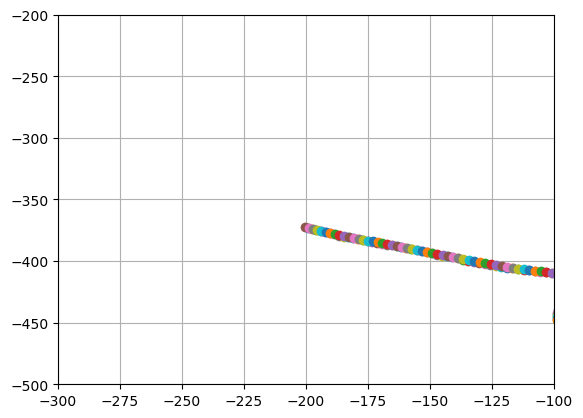

In [60]:
import matplotlib.pyplot as plt
fig = plt.figure()

for i in range(2,len(RefTraj)-1):
    plt.plot(RefTraj_X[i],RefTraj_Y[i],marker = 'o')

x = [float(RefTraj[2][0])]
y = [float(RefTraj[2][1])]

#lt.plot(RefTraj[2][0][0],RefTraj[2][1][0],marker = 'o', markersize = 2)
#plt.plot(x,y,marker = 'o', markersize = 10)

plt.xlim(-300, -100)
plt.ylim(-500, -200)
plt.grid(True)
plt.show()

In [61]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl
from scipy.spatial.transform import Rotation as R
import numpy as np

In [63]:
# Load the lidar points
label_df = pd.read_json('data/label_data_obstacles.json')
lidarData = []

In [65]:
truck = label_df[label_df["Truck"].str.len() != 0]
x_center_truck, y_center_truck, z_center_truck, x_len_truck, y_len_truck, z_len_truck, x_rot_truck, y_rot_truck, z_rot_truck = truck.iat[0,1]         # Position in meters, Orientation in degrees (Positive Clockwise)
pos_truck = np.array([[x_center_truck],[y_center_truck],[z_center_truck],[1.0]])                                                                      # Lidar Frame
#print("length of truck ")
#print (x_len_truck)
print(pos_truck)

[[ 9.70044499]
 [-5.94981258]
 [ 0.63164924]
 [ 1.        ]]


In [ ]:
def normalizeVec(x,y):
    distance = np.sqrt(x*x+y*y)
    return x/distance, y/distance

def makeOffsetPoly(oldX, oldY, offset, outer_ccw = 1):
    num_points = len(oldX)
    newX = []
    newY = []

    for curr in range(num_points):
        prev = (curr + num_points - 1) % num_points
        next = (curr + 1) % num_points

        vnX =  oldX[next] - oldX[curr]
        vnY =  oldY[next] - oldY[curr]
        vnnX, vnnY = normalizeVec(vnX,vnY)
        nnnX = vnnY
        nnnY = -vnnX

        vpX =  oldX[curr] - oldX[prev]
        vpY =  oldY[curr] - oldY[prev]
        vpnX, vpnY = normalizeVec(vpX,vpY)
        npnX = vpnY * outer_ccw
        npnY = -vpnX * outer_ccw

        bisX = (nnnX + npnX) * outer_ccw
        bisY = (nnnY + npnY) * outer_ccw

        bisnX, bisnY = normalizeVec(bisX,  bisY)
        bislen = offset /  np.sqrt((1 + nnnX*npnX + nnnY*npnY)/2)

        newX.append(oldX[curr] + bislen * bisnX)
        newY.append(oldY[curr] + bislen * bisnY)
        #print(curr)
        #print(newX[curr])
        #print(newY[curr])

    return newX, newY

leftlane_X, leftlane_Y = makeOffsetPoly(global_plan_x, global_plan_y, 0.75*road_width, -1)
print(leftlane_X)
print(leftlane_Y)

In [1]:
import numpy as np

In [4]:
rect_van = np.array([[1,1], [2,2], [3,3], [4,4]], dtype='float32')
print(rect_van.shape)

rect_van_shape = rect_van.reshape(4,1,2)
#print(rect_van_shape.shape)

(4, 2)


In [2]:
import numpy as np

In [3]:
ucsd_map = np.loadtxt("ucsd_map_it1.txt")